In [57]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Install required library**

In [58]:
# Upgrade and install imbalanced-learn to handle imbalanced datasets
!pip install -U imbalanced-learn

# Install Plotly for interactive plotting and visualisation
!pip install plotly

# Install  LIME library for model interpretability
!pip install lime

# Install  CatBoost library for gradient boosting on decision trees
!pip install catboost

# Install  LightGBM library for gradient boosting framework
!pip install lightgbm

# **Bring in  required library**

In [59]:
#this data analysis and manipulation library
import pandas as pdx

#Using a librrary for mamatical operations and handling multi-dimensional arra
import numpy as npx

# Adding a visualization creation library, particularly for static plots and grap
import matplotlib.pyplot as pltx

# Importing in a librrary to make more complex and visually appealing plots and vis
import seaborn as snsx

# Importing a tool divide a dataset into separate sats for trainning nd tessting
from sklearn.model_selection import train_test_split

# Bringing in Counter to count instances of each class label
from collections import Counter

# Including interactive graphing with Plotlly Expres
import plotly.express as px

# Adding Scaler for feature scaling
from sklearn.preprocessing import MinMaxScaler

# To handle imbalanced datasets, oversample minority classes using RandomOverSampler
from imblearn.over_sampling import RandomOverSampler

# Bringing in  PCA  for featue selction
from sklearn.decomposition import PCA

# Bringing in  StandardScaler for standardizing featurs
from sklearn.preprocessing import StandardScaler

# Bringing in  LightGBM library for  gredientbosting fremework
import lightgbm as lgb

# Bringing in vareous metrcs to evaluate clasification model performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Bringing in  AdaBostClasifier for  boosting ensemble method
from sklearn.ensemble import AdaBoostClassifier

# Bringing in  CatBostClasifier for gradint bosting with categorical featura support
from catboost import CatBoostClassifier

# Bringing in  SHAP library for model interpretation using SHapley values
import shap

# Bringing in  LIME library for Local Interpretable Model-agnostic Explanations
import lime

# Bringing in  limetabular module from LIME for tabular data interpretation
import lime.lime_tabular

# Turning off pointless warnings to improve  output's readability and cleanlin
import warnings

# imprt necceraary for werring
warnings.filterwarnings('ignore')

# **Read data set and select randomly 100000 sample**

In [60]:
# Define  file path list for  Google Drive dataset CSV files
file_paths = [
    '/content/drive/MyDrive/part-00000-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00002-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00006-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00010-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00012-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00014-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00016-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00018-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00020-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00022-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00026-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00028-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00030-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00032-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00034-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00036-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00038-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv',
    '/content/drive/MyDrive/part-00040-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv'
]

# Reaad each datta file into a pandas DataFram and put it in a list
df_list = [pdx.read_csv(file_path) for file_path in file_paths]

# Merge every DataFrame into a sinngle DataaFrame by concatenating m
iot = pdx.concat(df_list, ignore_index=True)

# For analysis, randomly choose 100,000 rows from  merged DataFrame
iotenvi = iot.sample(n=100000, random_state=42)

# n, display  sampled DataFrame's shape (rows, columns) to confirm  procedure
iotenvi.shape

(100000, 47)

# **Show Top five row of  dataset**

In [61]:
iotenvi.head()

flow_duration  Header_Length  Protocol Type  Duration        Rate  \
4237921      30.138364     1304347.20          13.70     90.80  131.775718   
3086329       5.692475         116.60           5.94     63.36    0.388100   
2195846       0.000000          54.00           6.00     64.00   32.693956   
3639757       0.000000           0.54          46.59     65.91   10.048475   
4465994       0.157385          67.50           5.94     63.36    3.317364   

              Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
4237921  131.775718    0.0              0.0              0.0              0.0   
3086329    0.388100    0.0              0.0              0.0              0.0   
2195846   32.693956    0.0              0.0              1.0              0.0   
3639757   10.048475    0.0              0.0              0.0              0.0   
4465994    3.317364    0.0              0.0              1.0              0.0   

         ...          Std  Tot size           IAT  Number   Magnitue  \
4237921  ...  1153.454525    792.00  1.666104e+08    13.5  40.146447   
3086329  ...     1.618531     54.46  8.295625e+07     9.5  10.482937   
2195846  ...     0.000000     54.00  8.308990e+07     9.5  10.392305   
3639757  ...    24.492828    586.62  8.367685e+07     9.5  34.165557   
4465994  ...     0.115267     54.06  8.336536e+07     9.5  10.395170   

              Radius    Covariance  Variance  Weight                    label  
4237921  1635.077302  1.339710e+06      1.00  244.60         MITM-ArpSpoofing  
3086329     2.291351  1.242769e+01      0.27  141.55            DoS-TCP_Flood  
2195846     0.000000  0.000000e+00      0.00  141.55           DDoS-SYN_Flood  
3639757    34.678810  3.890752e+03      0.16  141.55       Mirai-greeth_flood  
4465994     0.163466  1.676534e-01      0.08  141.55  DDoS-SynonymousIP_Flood  

[5 rows x 47 columns]

# **Shape of dataset**

In [62]:
iotenvi.shape

(100000, 47)

# **Information of  dataset**

In [63]:
iotenvi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 4237921 to 2017720
Data columns (total 47 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   flow_duration    100000 non-null  float64
 1   Header_Length    100000 non-null  float64
 2   Protocol Type    100000 non-null  float64
 3   Duration         100000 non-null  float64
 4   Rate             100000 non-null  float64
 5   Srate            100000 non-null  float64
 6   Drate            100000 non-null  float64
 7   fin_flag_number  100000 non-null  float64
 8   syn_flag_number  100000 non-null  float64
 9   rst_flag_number  100000 non-null  float64
 10  psh_flag_number  100000 non-null  float64
 11  ack_flag_number  100000 non-null  float64
 12  ece_flag_number  100000 non-null  float64
 13  cwr_flag_number  100000 non-null  float64
 14  ack_count        100000 non-null  float64
 15  syn_count        100000 non-null  float64
 16  fin_count        100000 non-null  fl

# **Data description**

In [64]:
iotenvi.describe().T

count          mean           std           min  \
flow_duration    100000.0  5.849352e+00  2.346617e+02  0.000000e+00   
Header_Length    100000.0  7.667547e+04  4.584832e+05  0.000000e+00   
Protocol Type    100000.0  9.073746e+00  8.925422e+00  0.000000e+00   
Duration         100000.0  6.641408e+01  1.434255e+01  0.000000e+00   
Rate             100000.0  8.652790e+03  9.463219e+04  0.000000e+00   
Srate            100000.0  8.652790e+03  9.463219e+04  0.000000e+00   
Drate            100000.0  2.329523e-06  5.962837e-04  0.000000e+00   
fin_flag_number  100000.0  8.602000e-02  2.803950e-01  0.000000e+00   
syn_flag_number  100000.0  2.086200e-01  4.063242e-01  0.000000e+00   
rst_flag_number  100000.0  9.001000e-02  2.861975e-01  0.000000e+00   
psh_flag_number  100000.0  8.615000e-02  2.805868e-01  0.000000e+00   
ack_flag_number  100000.0  1.216100e-01  3.268365e-01  0.000000e+00   
ece_flag_number  100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
cwr_flag_number  100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
ack_count        100000.0  9.017818e-02  2.859530e-01  0.000000e+00   
syn_count        100000.0  3.328451e-01  6.665821e-01  0.000000e+00   
fin_count        100000.0  1.001515e-01  4.367711e-01  0.000000e+00   
urg_count        100000.0  6.262547e+00  7.240773e+01  0.000000e+00   
rst_count        100000.0  3.837450e+01  3.246551e+02  0.000000e+00   
HTTP             100000.0  4.840000e-02  2.146110e-01  0.000000e+00   
HTTPS            100000.0  5.549000e-02  2.289353e-01  0.000000e+00   
DNS              100000.0  1.100000e-04  1.048756e-02  0.000000e+00   
Telnet           100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
SMTP             100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
SSH              100000.0  4.000000e-05  6.324460e-03  0.000000e+00   
IRC              100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
TCP              100000.0  5.730400e-01  4.946389e-01  0.000000e+00   
UDP              100000.0  2.130200e-01  4.094437e-01  0.000000e+00   
DHCP             100000.0  0.000000e+00  0.000000e+00  0.000000e+00   
ARP              100000.0  6.000000e-05  7.745773e-03  0.000000e+00   
ICMP             100000.0  1.634000e-01  3.697321e-01  0.000000e+00   
IPv              100000.0  9.998900e-01  1.048756e-02  0.000000e+00   
LLC              100000.0  9.998900e-01  1.048756e-02  0.000000e+00   
Tot sum          100000.0  1.303277e+03  2.586651e+03  6.300000e+01   
Min              100000.0  9.115790e+01  1.380811e+02  4.200000e+01   
Max              100000.0  1.816102e+02  5.242597e+02  4.200000e+01   
AVG              100000.0  1.240863e+02  2.378852e+02  4.200000e+01   
Std              100000.0  3.339430e+01  1.613675e+02  0.000000e+00   
Tot size         100000.0  1.243322e+02  2.403447e+02  4.200000e+01   
IAT              100000.0  8.322191e+07  1.709898e+07  3.178914e-07   
Number           100000.0  9.500676e+00  8.215634e-01  1.500000e+00   
Magnitue         100000.0  1.310736e+01  8.578591e+00  9.165151e+00   
Radius           100000.0  4.719201e+01  2.282449e+02  0.000000e+00   
Covariance       100000.0  3.116189e+04  3.605571e+05  0.000000e+00   
Variance         100000.0  9.698779e-02  2.337629e-01  0.000000e+00   
Weight           100000.0  1.415687e+02  2.113069e+01  2.500000e+00   

                          25%           50%           75%           max  
flow_duration    0.000000e+00  0.000000e+00  1.058061e-01  3.423159e+04  
Header_Length    5.400000e+01  5.400000e+01  4.070250e+02  9.817380e+06  
Protocol Type    6.000000e+00  6.000000e+00  1.480000e+01  4.700000e+01  
Duration         6.400000e+01  6.400000e+01  6.400000e+01  2.550000e+02  
Rate             2.120151e+00  1.587110e+01  1.234890e+02  4.194304e+06  
Srate            2.120151e+00  1.587110e+01  1.234890e+02  4.194304e+06  
Drate            0.000000e+00  0.000000e+00  0.000000e+00  1.855718e-01  
fin_flag_number  0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
syn_flag_number 

# **Chack Duplicated value**

In [65]:
iotenvi.duplicated().sum()

np.int64(0)

# **Chack missing value**

In [66]:
iotenvi.isnull().sum()

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
dtype: int64

# **Drop irrelevant columns**

In [67]:
# Drop irrelevant columns
iotenvi = iotenvi.drop(['Drate', 'ece_flag_number', 'cwr_flag_number', 'SMTP', 'Telnet','IRC'], axis=1)
iotenvi.shape

(100000, 41)

# **Create classes of target column**

In [68]:
# Establish a mapping from particular attack types to generic categories
label_mapping = {
    # Map DDoS-ACK_Fragmentation to DDoS category
    'DDoS-ACK_Fragmentation': 'DDoS',
    # Map DDoS-UDP_Flood to DDoS category
    'DDoS-UDP_Flood': 'DDoS',
    # DDoS-ICMP_Flood to DDoS category mapping
    'DDoS-ICMP_Flood': 'DDoS',
    # DDoS-SlowLoris to DDoS category mapping
    'DDoS-SlowLoris': 'DDoS',
    # Label DDoS-RSTFINFlood as DDoS
    'DDoS-RSTFINFlood': 'DDoS',
    # Label DDoS-PSHACK_Flood as DDoS
    'DDoS-PSHACK_Flood': 'DDoS',
    # Label DDoS-HTTP_Flood as DDoS
    'DDoS-HTTP_Flood': 'DDoS',
    # Label DDoS-UDP_Fragmentation as DDoS
    'DDoS-UDP_Fragmentation': 'DDoS',
    # Convert DDoS-TCP_Flood to DDoS
    'DDoS-TCP_Flood': 'DDoS',
    # Convert DDoS-SYN_Flood to DDoS
    'DDoS-SYN_Flood': 'DDoS',
    # Convert DDoS-SynonymousIP_Flood to DDoS
    'DDoS-SynonymousIP_Flood': 'DDoS',

    # Map Dictionary Category: BruteForce to Brute Force
    'DictionaryBruteForce': 'Brute Force',

    # Map  Spoofing category to MITM-ArpSpoofing
    'MITM-ArpSpoofing': 'Spoofing',
    # Assign DNS_Spoofing to  category of spoofing
    'DNS_Spoofing': 'Spoofing',

    # DoS-TCP_Flood to DoS category mapping
    'DoS-TCP_Flood': 'DoS',
    # DoS-HTTP_Flood to DoS category
    'DoS-HTTP_Flood': 'DoS',
    # Convert DoS-SYN_Flood to  DoS classification
    'DoS-SYN_Flood': 'DoS',
    # Convert DoS-UDP_Flood to  DoS classification
    'DoS-UDP_Flood': 'DoS',

    # Map Recon-OSScan to Recon category
    'Recon-OSScan': 'Recon',
    # Map Recon-PingSweep to Recon category
    'Recon-PingSweep': 'Recon',
    # Map Recon-VulnerabilityScan to Recon category
    'VulnerabilityScan': 'Recon',
    # Map Recon-PortScan to Recon category
    'Recon-PortScan': 'Recon',
    # Connect Recon-HostDiscovery to  category of Recon
    'Recon-HostDiscovery': 'Recon',

    # Map  Web-based category to SQLInjection
    'SqlInjection': 'Web-based',
    # Map Web-based category to CommandInjection
    'CommandInjection': 'Web-based',
    # Map  Web-based category to Backdoor Malware
    'Backdoor_Malware': 'Web-based',
    # Attach to Web-based category when uploading maps
    'Uploading_Attack': 'Web-based',
    # Convert XSS to a Web-based classification
    'XSS': 'Web-based',
    # Map Browser Hijacking to  category of web-based
    'BrowserHijacking': 'Web-based',

    # Map  following: Mirai-udpplain to Mirai category
    'Mirai-udpplain': 'Mirai',
    # Map  following: Mirai-greip_flood to Mirai category
    'Mirai-greip_flood': 'Mirai',
    # Map  following: Mirai-greeth_flood to Mirai category
    'Mirai-greeth_flood': 'Mirai',

    # Convert BenignTraffic to  Benign classification
    'BenignTraffic': 'Benign'
}

# To generate a new 'grouped_label' column, apply  label mapping to  original 'label' column.
iotenvi['grouped_label'] = iotenvi['label'].map(label_mapping)

# Show  number of each type of grouped labels.
print(iotenvi['grouped_label'].value_counts())


grouped_label
DDoS           71796
DoS            17391
Mirai           5613
Benign          2335
Spoofing        1096
Recon            748
Web-based         57
Brute Force       36
Name: count, dtype: int64


# **Bar graph of distribution of group lables**

In [69]:
# Count occurences of eaach unique value in 'groupedlabl' colmn
grouped_label_counts = iotenvi['grouped_label'].value_counts()

# Reset index to convert Series to DataFrame for plotting
df_plot = grouped_label_counts.reset_index()

# Rename columns to 'grouped_label' and 'count'
df_plot.columns = ['grouped_label', 'count']

# Create a dictionary for custom colors for each label category
custom_colors = {
    'Label1': '#636EFA',
    'Label2': '#EF553B',
    'Label3': '#00CC96',
    'Label4': '#AB63FA',
    # Add more as needed for your labels
}

# Use Plotly Express to create a bar plot with specified x, y, and color parameters
fig = px.bar(
    df_plot,
    x='grouped_label',
    y='count',
    color='grouped_label',

    # Apply  custom color mapping to  grouped labels in  plot
    color_discrete_map=custom_colors,
    title='Distribution of Grouped Labels'
)

# apply a white me, conceal  legend, and set  plott tittle and axis labls.
fig.update_layout(
    xaxis_title='Grouped Label',        # Assign label to xaxis
    yaxis_title='Count',                # Assign label to yaxis
    xaxis_tickangle=45,                 # Rotate x-axis tick labls by 45 degrees
    template='plotly_white',            # Usse  plot's white backdrop me
    showlegend=False                    # Make  plot legend inviseble
)


# Display  plot
fig.show()


pie chart of grouped lable

In [70]:
# Count  instances of every distinct value in  'grouped_label' column, n resett  indax to turn it into a DataaFrame
label_counts = iotenvi['grouped_label'].value_counts().reset_index()

# For clarity, rename  columns of  generated DataFrame to 'grouped_label' and 'count'
label_counts.columns = ['grouped_label', 'count']

# Using Plotly Express, creaate a pie chaart
fig = px.pie(label_counts, values='count', names='grouped_label', title='Distribution of Grouped Labels')

# present  pie chart
fig.show()

# **pair plot of se feature 'Rate', 'Srate', 'Duration', 'flow_duration'.**

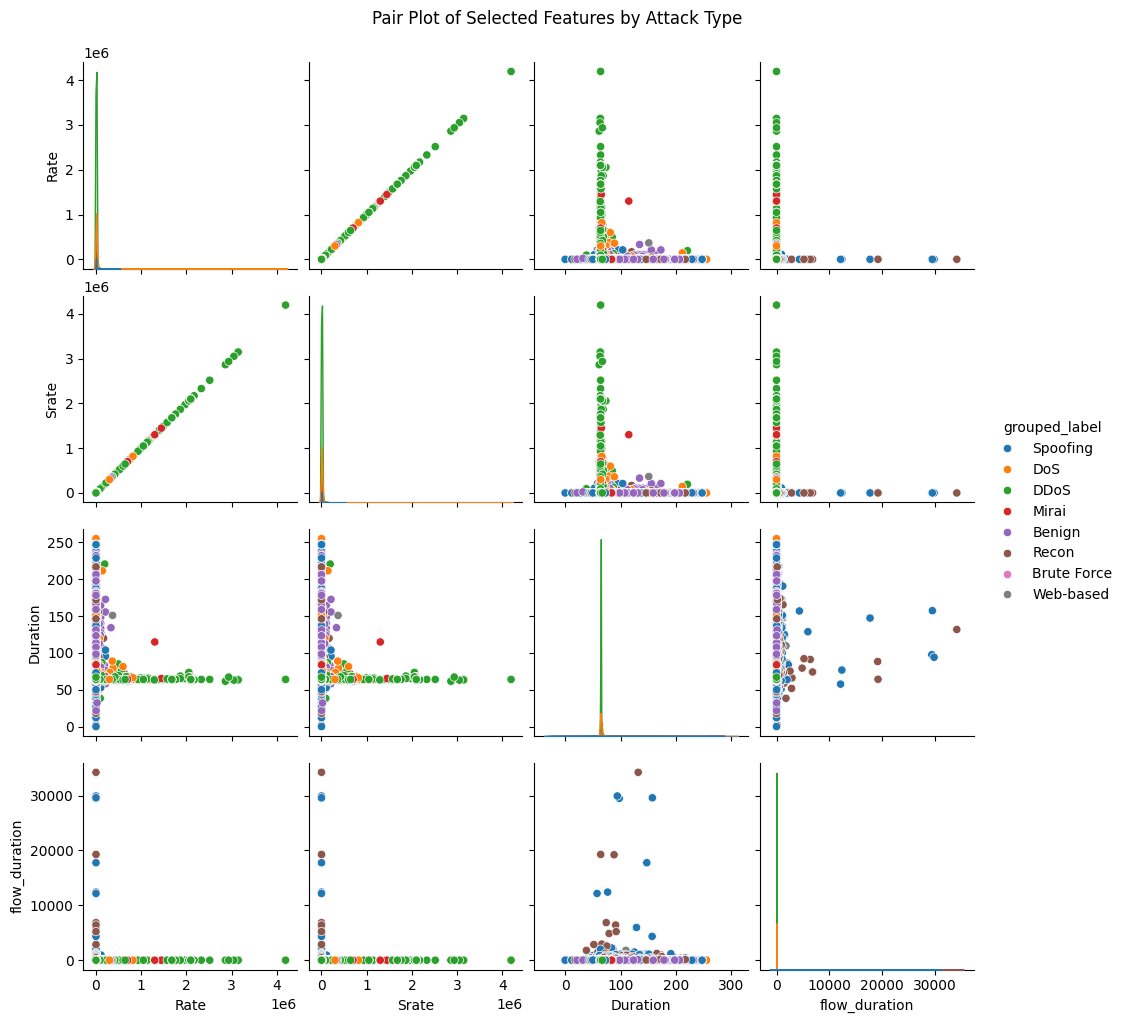

In [71]:
# Specify which characteristics should be included in  pair plot.
features_for_pairplot = ['Rate', 'Srate', 'Duration', 'flow_duration']

# To see pairwise correlations between features with various attack kinds or labels,
snsx.pairplot(iotenvi[features_for_pairplot + ['grouped_label']], hue='grouped_label')

# Place  full figure's title just above  top.
pltx.suptitle('Pair Plot of Selected Features by Attack Type', y=1.02)

# present  plot
pltx.show()

# **Apply min max scaling**

In [72]:
# Choose every column of numeric features from  DataFrame
featurestoscale = iotenvi.select_dtypes(include=npx.number).columns.tolist()

# Prevent  'label' and 'grouped_label' columns from scaling if y exist
if 'label' in featurestoscale:
    featurestoscale.remove('label')
if 'grouped_label' in featurestoscale:
    featurestoscale.remove('grouped_label')

# Set up  MinMaxScaler for normalization
scaler = MinMaxScaler()

# Apply MinMaxscaling to  DataFrame's chosen numeric features
iotenvi[featurestoscale] = scaler.fit_transform(iotenvi[featurestoscale])

# **Show graph of create class of target column**

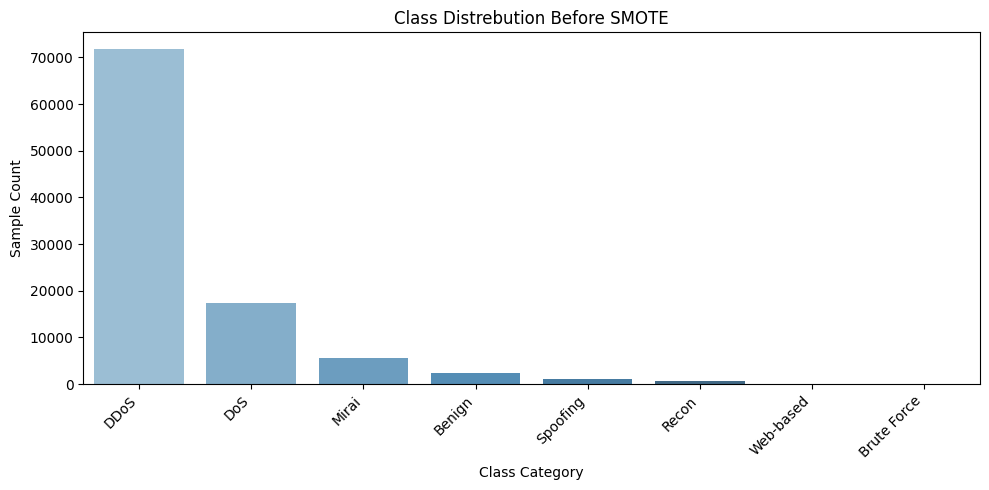

In [73]:
# Take  'groupedlabal' target variable out of  iotenvi DataFrame.
y = iotenvi['grouped_label']

# Before using SMOTE, determine  frequency or caunt of each claass in  target variable.
classcountsoriginal = y.value_counts()

# To save class names and ir associated counts for visualization, create a new DataFrame.
df_original = pdx.DataFrame({
    'Class': classcountsoriginal.index,
    'Count': classcountsoriginal.values
})

# Produce a brand-new plot figure of a specific dimensions.
pltx.figure(figsize=(10, 5))

# Before using SMOTE, create a barplot with Seaborn to display  distribution of classes.
snsx.barplot(data=df_original, x='Class', y='Count', palette='Blues_d', hue='Class', legend=False)

# Establish  plot's tittle.
pltx.title('Class Distrebution Before SMOTE')

# Indicate  plot's x-axis.
pltx.xlabel('Class Category')

# Labl  plot's y-axis.
pltx.ylabel('Sample Count')

# To improve readability, rotate  x-axis labels.
pltx.xticks(rotation=45, ha='right')

# Modify  plot arrangement to avoid label and title clipping.
pltx.tight_layout()

# present  finished plan.
pltx.show()

# **converted target column class into 2 new class benign and attack**

binary_label
1    97665
0     2335
Name: count, dtype: int64


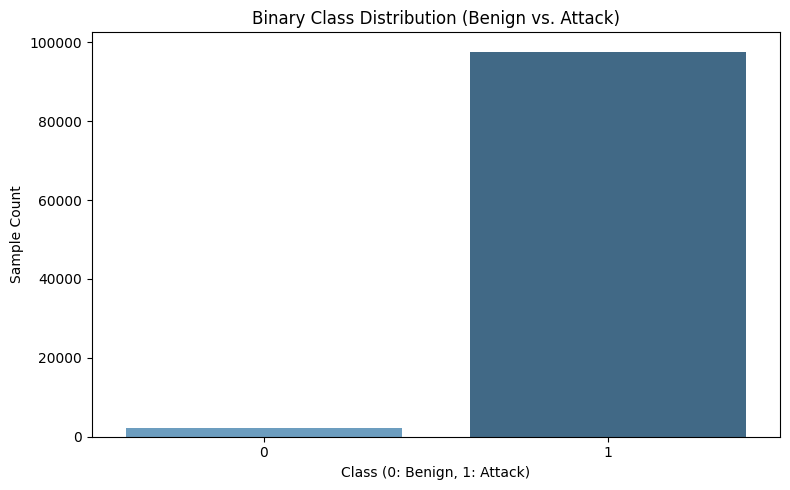

In [74]:
# Assign 'Benign' to 0 and all or labels to 1 in a new binary label column
iotenvi['binary_label'] = iotenvi['grouped_label'].apply(lambda x: 0 if x == 'Benign' else 1)

# Output  number of each class in  binary labl column
print(iotenvi['binary_label'].value_counts())

# Extract  binary labl column as  target variable y_binary
y_binary = iotenvi['binary_label']

# Determine how many sample's are in each binary claass
classcountsbinary = y_binary.value_counts()

# Make a DataFrame for class counts that includes  names of  classes and  corresponding counts
df_binary = pdx.DataFrame({
    'Class': classcountsbinary.index,
    'Count': classcountsbinary.values
})

# Adjust  plot figure's size
pltx.figure(figsize=(8, 5))

# Create a barplot that uses a blue color scheme to display  distribution of  binary classes
snsx.barplot(data=df_binary, x='Class', y='Count', palette='Blues_d', hue='Class', legend=False)

# Give  plot a tittle that describes  distrebution of  binary classes
pltx.title('Binary Class Distribution (Benign vs. Attack)')

# Indicate class labels on  x-axis (0: Benign, 1: Attack) and  number of samples in each class on  y-axis
pltx.xlabel('Class (0: Benign, 1: Attack)')
pltx.ylabel('Sample Count')

# For easy reading, rotate  x-axis labels by 0 degrees
pltx.xticks(rotation=0)

# Modify  arrangement to avoid overlap and make sure  plot fits properly
pltx.tight_layout()

# Present  plot
pltx.show()


# **Balance  data**

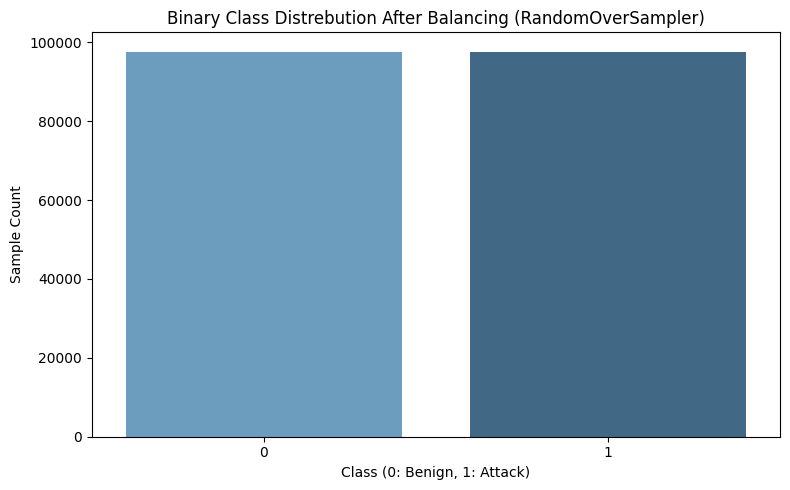

In [75]:
# Take features and  tarrget variabl out of  DataFrame.
X = iotenvi.drop(['label', 'grouped_label', 'binary_label'], axis=1)
y = iotenvi['binary_label']

# Set RandomOverSamp's initial ranndom statte for reprodcibility
ros = RandomOverSampler(random_state=42)

# Use Ros to oversampple  minority clas in order to balance  classes
X_resamped, y_resamped = ros.fit_resample(X, y)

# Find  number of each class in  target variable that has been resampled.
class_counts_resampled = y_resamped.value_counts()

# To visualize, create a new DataFrame with class labels and  associated counts
df_resampled = pdx.DataFrame({
    'Class': class_counts_resampled.index,
    'Count': class_counts_resampled.values
})

# Plot's figure size should be set
pltx.figure(figsize=(8, 5))

# Plot a barplot with a blue color scheme that displays  number of each class after balancing
snsx.barplot(data=df_resampled, x='Class', y='Count', palette='Blues_d', hue='Class', legend=False)

# Give  plot a tittle
pltx.title('Binary Class Distrebution After Balancing (RandomOverSampler)')

# Put  class names on  x-axis label
pltx.xlabel('Class (0: Benign, 1: Attack)')

# Put  sample counts on  y-axis
pltx.ylabel('Sample Count')

# Make sure  tick labels on  x-axis are horizontal
pltx.xticks(rotation=0)

# Modify  layout to avoid labels and titles being clipped
pltx.tight_layout()

# Present  plot
pltx.show()


# **`Apply pca for feature selection**

In [76]:
# Only numerical columns from  dataset should be chosen for PCA processing.
X_numeric = X_resamped.select_dtypes(include=npx.number)

# Set up a StandardScaler instance to standardize features prior to PCA.
scaler = StandardScaler()

# set up  scalar to  numericl
X_scaled = scaler.fit_transform(X_numeric)

# select 20 feature
pca = PCA(n_components=20)

# Use dimensionality reduction and fit PCA to scaled data.
X_pca = pca.fit_transform(X_scaled)

# Make a new DataaFrame with  names of  associated columns for each of  20 PCA components.
X_pca_df = pdx.DataFrame(X_pca, columns=[f'PCA_Component_{i+1}' for i in range(20)])

# Print  original feature set's shape before PCA.
print("shape of features:", X_resamped.shape)

# After PCA, print  features' shape.
print("Shape of features after PCA:", X_pca_df.shape)


shape of features: (195330, 40)
Shape of features after PCA: (195330, 20)


# **Split data**

In [77]:
# guarantees repeatability of  split.
Xtrainiot, Xtestiot, ytrainiot, ytestiot = train_test_split(X_pca_df, y_resamped, test_size=0.2, random_state=52)

# Output  trainning feature sett's shape and trainning labels.
print(f"Train set shape: Xtrainiot {Xtrainiot.shape}, ytrainiot {ytrainiot.shape}")

# Output  testing labels and  testing feature set's form.
print(f"Test set shape: Xtestiot {Xtestiot.shape}, ytestiot {ytestiot.shape}")

Train set shape: Xtrainiot (156264, 20), ytrainiot (156264,)
Test set shape: Xtestiot (39066, 20), ytestiot (39066,)


# **Apply model 1 - LGBM**

In [78]:
# Set up  LightGBM classifier with  given random state, learning rate, and number of estimators.
lgbmclf = lgb.LGBMClassifier(random_state=42, learning_rate=0.1, n_estimators=50)

# Use  trainning data feaatures and labls to trrain  LGBMmodel.
lgbmclf.fit(Xtrainiot, ytrainiot)

# Use  traained modl to pradict  targget labls for  testt dataa.
y_pred_lgbm = lgbmclf.predict(Xtestiot)

[LightGBM] [Info] Number of positive: 78134, number of negative: 78130
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039803 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 156264, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500013 -> initscore=0.000051
[LightGBM] [Info] Start training from score 0.000051


# **Training result of lgbm**

In [79]:
# Use  trained LightGBM model to predict  target values for  training set
ypredtrainlgbm = lgbmclf.predict(Xtrainiot)

# Determine  accuracy of  LightGBM model on  training data
accuracytrainiot_lgbm = accuracy_score(ytrainiot, ypredtrainlgbm)

# Print  trainning acuracy formatted to four decimal places
print(f"LightGBM Training Accuracy: {accuracytrainiot_lgbm:.4f}")

# Determine LightGBM model precision score on training data
precision_train_lgbm = precision_score(ytrainiot, ypredtrainlgbm)

# Determine LightGBM model recall score on training data
recall_train_lgbm = recall_score(ytrainiot, ypredtrainlgbm)

# Determine LightGBM model F1 score on training data
f1_train_lgbm = f1_score(ytrainiot, ypredtrainlgbm)

#  training precision format should be printed to four decimal places
print(f"LGBM Training Precision: {precision_train_lgbm:.4f}")

# Format  training recall to four decimal places and print it
print(f"LGBM Training Recall: {recall_train_lgbm:.4f}")

# Output  training F1  score in four decimal places
print(f"LGBM Training F1 Score: {f1_train_lgbm:.4f}")


LightGBM Training Accuracy: 0.9947
LGBM Training Precision: 1.0000
LGBM Training Recall: 0.9894
LGBM Training F1 Score: 0.9947


In [80]:
# Traaining Sett Clasification Repoort
print("\nClassification Report (Training Set):")
# output clasification repoort .
print(classification_report(ytrainiot, ypredtrainlgbm))


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     78130
           1       1.00      0.99      0.99     78134

    accuracy                           0.99    156264
   macro avg       0.99      0.99      0.99    156264
weighted avg       0.99      0.99      0.99    156264



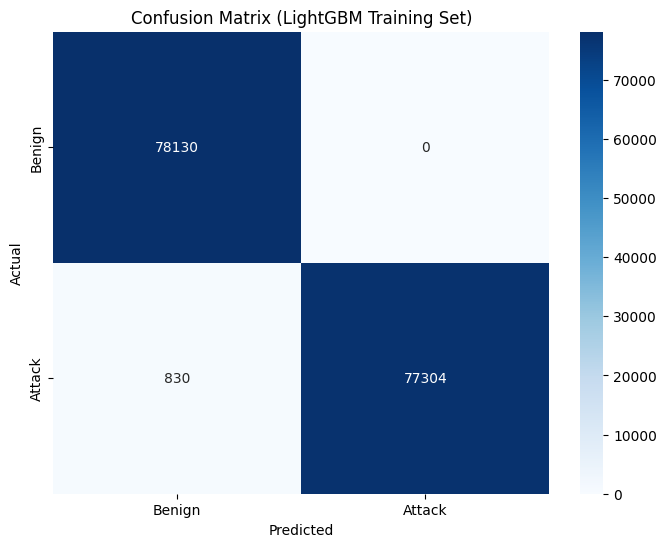

In [81]:
# Determine  confussion mattrix for  LightGBM model's traaining sett pradictions
cm_train_lgbm = confusion_matrix(ytrainiot, ypredtrainlgbm)

# Establish  plot's figure size
pltx.figure(figsize=(8, 6))

# Construct a heattmap of  confuson mattrix in integer format with annotations
snsx.heatmap(cm_train_lgbm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])

# Put "Predictd" on  xaxis and "Actual" on  yaxis.
pltx.xlabel('Predicted')
pltx.ylabel('Actual')

# Change  plot's title to "Confuion Mattrix (LightGBM Training Set)."
pltx.title('Confusion Matrix (LightGBM Training Set)')

# Present  plott
pltx.show()


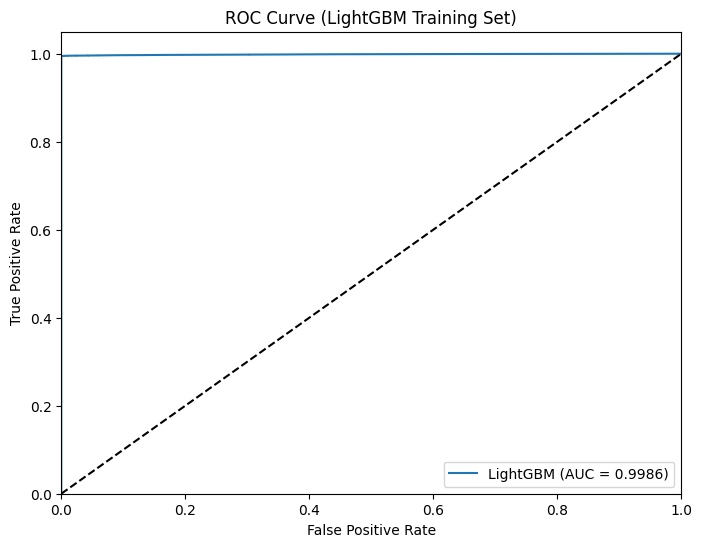

In [82]:
# Determine  FalsePR,TruePR, and thresholds for LGBM predictons on traaining dataa
fpr_train_lgbm, tpr_train_lgbm, _ = roc_curve(ytrainiot, lgbmclf.predict_proba(Xtrainiot)[:, 1])

# Compute  Area Under  Crv (AUC) for  traaining sett predictions
roc_auc_train_lgbm = roc_auc_score(ytrainiot, lgbmclf.predict_proba(Xtrainiot)[:, 1])

#define  size of pott
pltx.figure(figsize=(8, 6))

# Plot  ROC crv with FalsePR on  -axis and TruePR on  yaxis, including  AUC value in  label
pltx.plot(fpr_train_lgbm, tpr_train_lgbm, label=f'LightGBM (AUC = {roc_auc_train_lgbm:.4f})')

# Plott a diagoonal dashed line reprasenting
pltx.plot([0, 1], [0, 1], 'k--')

# Sett x-axis limts between 0 and 1
pltx.xlim([0.0, 1.0])

# Sett y-axis limits between 0 and just above 1 to improve visibility
pltx.ylim([0.0, 1.05])

# Labl  xaxis as 'FalsePositiveRate'
pltx.xlabel('False Positive Rate')

# Labl  yaxis as 'TruePositiveRate'
pltx.ylabel('True Positive Rate')

# Sett  titttle of  plot
pltx.title('ROC Curve (LightGBM Training Set)')

# Incorporate a legnd at  plot's loweer rightt.
pltx.legend(loc="lower right")

# Display  plott
pltx.show()


# **Testing result of lgbm**

In [83]:
# Determine  accuracy score by compaaring  trrue and preddicted labls.
accuracy_lgbm = accuracy_score(ytestiot, y_pred_lgbm)

# Determine  preccision scoore by compaaring  trrue and preddicted labls.
precision_lgbm = precision_score(ytestiot, y_pred_lgbm)

# Determine  recall score by compaaring  trrue and preddicted labls.
recall_lgbm = recall_score(ytestiot, y_pred_lgbm)

# Determine  F1 score by compaaring  trrue and preddicted labls.
f1_lgbm = f1_score(ytestiot, y_pred_lgbm)

# Using  test data's projected probabilities for a positive class
roc_auc_lgbm = roc_auc_score(ytestiot, lgbmclf.predict_proba(Xtestiot)[:, 1])
# output  acuracy score of  LightGBM model formatted to four decimal places.
print(f"LightGBM Accuracy: {accuracy_lgbm:.4f}")

# output, witth four decimalplaces,  LightGBM model's precision score.
print(f"LightGBM Precision: {precision_lgbm:.4f}")

# output, witth four decimalplaces,  LightGBM model's recall score.
print(f"LightGBM Recall: {recall_lgbm:.4f}")

# output, witth four decimalplaces,  LightGBM model's F1 score.
print(f"LightGBM F1 Score: {f1_lgbm:.4f}")

LightGBM Accuracy: 0.9937
LightGBM Precision: 1.0000
LightGBM Recall: 0.9874
LightGBM F1 Score: 0.9937


In [84]:
# To make  categorization report easier to read, print a newline before it.
print("\nClassification Report:")
# report on output categorization
print(classification_report(ytestiot, y_pred_lgbm))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     19535
           1       1.00      0.99      0.99     19531

    accuracy                           0.99     39066
   macro avg       0.99      0.99      0.99     39066
weighted avg       0.99      0.99      0.99     39066



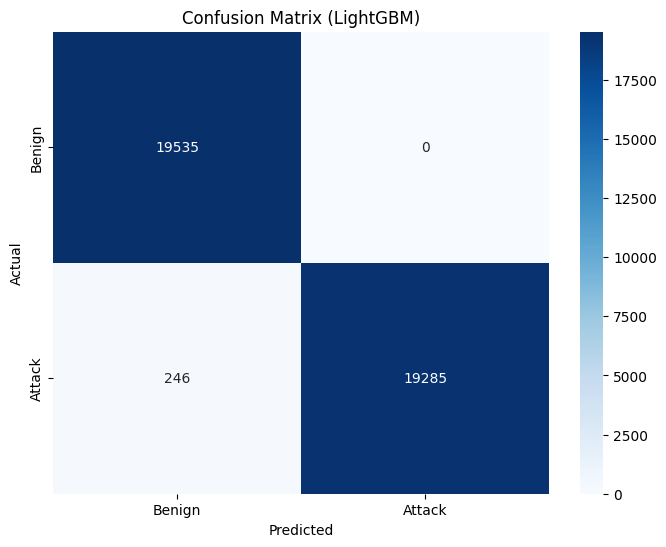

In [85]:
# Determine  confussion mattrix by contrasting  LGBM modl's predicted and real labls.
cm_lgbm = confusion_matrix(ytestiot, y_pred_lgbm)

# Create a new figure with a chosen size for  plot
pltx.figure(figsize=(8, 6))

# Plott a heattmap of  confussion mattrix witth annotations displaying counts as integers
snsx.heatmap(cm_lgbm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])

# Labl  xaxis as 'Predicted'
pltx.xlabel('Predicted')

# Labl  yaxis as 'Actual'
pltx.ylabel('Actual')

# Sett  plott tittle to 'Confussion Mattrix (LightGBM)'
pltx.title('Confusion Matrix (LightGBM)')

# show's  plott
pltx.show()

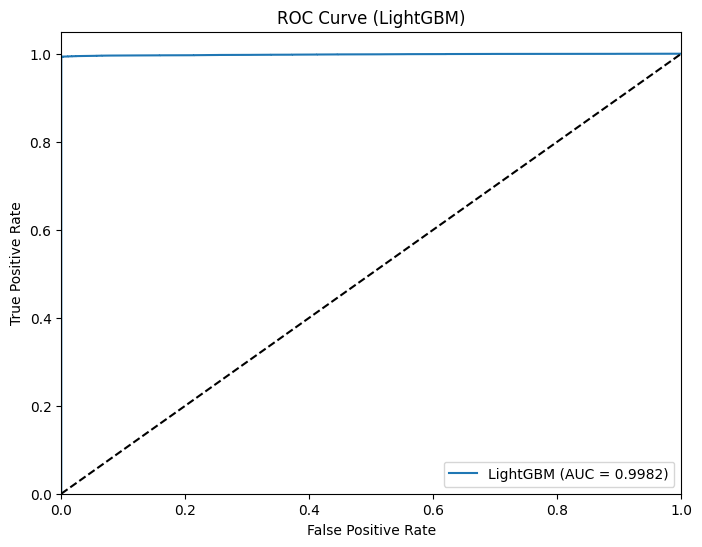

In [86]:
# Define  falsepositiv rate, truepositiverate, and criterion for LGBM model predictions.
fpr_lgbm, tpr_lgbm, _ = roc_curve(ytestiot, lgbmclf.predict_proba(Xtestiot)[:, 1])

# Make a new figure that
pltx.figure(figsize=(8, 6))

# Use  FalsePR and TruePR data to plott  ROC crv, labeling it with  AUC score.
pltx.plot(fpr_lgbm, tpr_lgbm, label=f'LightGBM (AUC = {roc_auc_lgbm:.4f})')

# Plott a diagonal dashd line representing a randm clasifier baseline.
pltx.plot([0, 1], [0, 1], 'k--')

# Sett  xaxis limets from 0 to 1.
pltx.xlim([0.0, 1.0])

# Sett  yaxis limets from 0 to slightly above 1.
pltx.ylim([0.0, 1.05])

# Labl  xaxis as "FalsePR".
pltx.xlabel('False Positive Rate')

# Labl  yaxis as "TruePR".
pltx.ylabel('True Positive Rate')

# Sett  plott tittle to "ROC Curve (LightGBM)".
pltx.title('ROC Curve (LightGBM)')

# Place  lagend in  lrc of  plott.
pltx.legend(loc="lower right")

# present  plott.
pltx.show()


# **Apply model 2 - Ada Boost Model**

In [87]:
# Set up AdaBoostClassifier .
adaboost_model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Training  AdaBoost model .
adaboost_model.fit(Xtrainiot, ytrainiot)

# Use  trained AdaBoost model to predict targeet labls for  testt dataset.
y_pred_adaboost = adaboost_model.predict(Xtestiot)

# **Training result of Ada Boost**

In [88]:
# Use  AdaBost modl to predict  target labls for  traaining dataa
y_pred_train_adaboost = adaboost_model.predict(Xtrainiot)

# Determine  AdaBost modl's acuracy on  traaining dataa
accuracytrainiot_adaboost = accuracy_score(ytrainiot, y_pred_train_adaboost)

# Print  AdaBost modl's traaining acuracy prepared to four decimal places
print(f"AdaBoost Training Accuracy: {accuracytrainiot_adaboost:.4f}")

# Determine  AdaBost modl's precesion on  trainning data
precision_train_adaboost = precision_score(ytrainiot, y_pred_train_adaboost)

# Determine  AdaBost model's recall on  training data
recall_train_adaboost = recall_score(ytrainiot, y_pred_train_adaboost)

# Utilizing  training data, determine  AdaBoost model's F1-score
f1_train_adaboost = f1_score(ytrainiot, y_pred_train_adaboost)

#  AdaBoost model's training precision should be reported with four decimal places
print(f"AdaBoost Training Precision: {precision_train_adaboost:.4f}")

#  AdaBoost model's training recall should be printed with four decimal places
print(f"AdaBoost Training Recall: {recall_train_adaboost:.4f}")

#  AdaBoost model's training F1-score should be shown with four decimal places
print(f"AdaBoost Training F1 Score: {f1_train_adaboost:.4f}")


AdaBoost Training Accuracy: 0.9878
AdaBoost Training Precision: 0.9941
AdaBoost Training Recall: 0.9815
AdaBoost Training F1 Score: 0.9877


In [89]:
# Name of Clasification Report
print("\nClassification Report (Training Set):")
# output clasification repoort
print(classification_report(ytrainiot, y_pred_train_adaboost))


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     78130
           1       0.99      0.98      0.99     78134

    accuracy                           0.99    156264
   macro avg       0.99      0.99      0.99    156264
weighted avg       0.99      0.99      0.99    156264



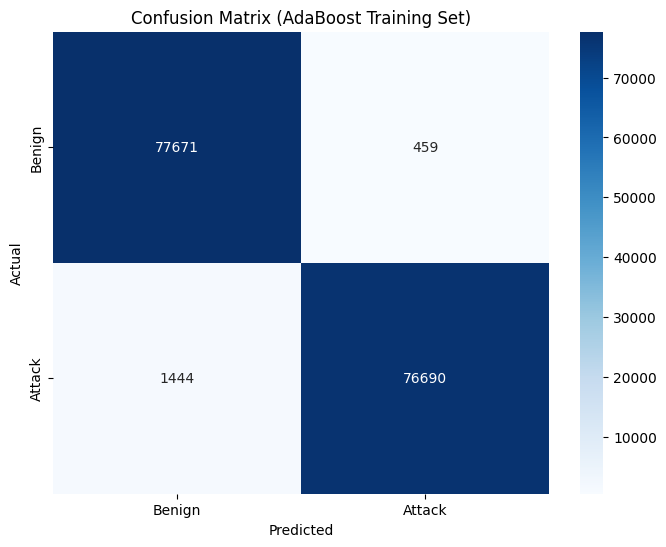

In [90]:
# Use AdaBost to calculate  confuson mattrix for traaining sett predections
cm_train_adaboost = confusion_matrix(ytrainiot, y_pred_train_adaboost)

# set plott size
pltx.figure(figsize=(8, 6))

# Set  color map to blues for clarity
snsx.heatmap(cm_train_adaboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'],  # Designate "Benign" and "Attack" as predicted classes for x-axis ticks
            yticklabels=['Benign', 'Attack'])  # Designate "Benign" and "Attack" as actual classes for y-axis ticks

# Assign  labl "Predictted" to  xaxis
pltx.xlabel('Predicted')

# Assign  labl "Acttual" to  yaxis
pltx.ylabel('Actual')

# Indicate in  plott tittle that this is  confuson martrix for  AdaBost trainning sett
pltx.title('Confusion Matrix (AdaBoost Training Set)')

# Show  plot
pltx.show()

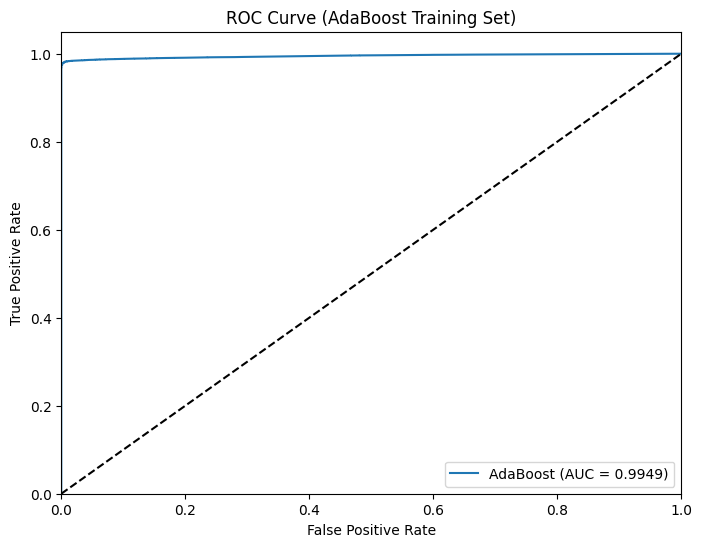

In [91]:
# Determine  ROC curve thresholds, falsePR, and truePR for trainning dataa
fpr_train_adaboost, tpr_train_adaboost, _ = roc_curve(ytrainiot, adaboost_model.predict_proba(Xtrainiot)[:, 1])

# Determine  Area Under  Crv score for trainning data predictions
roc_auc_train_adaboost = roc_auc_score(ytrainiot, adaboost_model.predict_proba(Xtrainiot)[:, 1])

# Creaate a new fig for plott witth a given size
pltx.figure(figsize=(8, 6))

# Create  ROC curve by plotting  true positive and false positive rates and labeling it with  AUC score.
pltx.plot(fpr_train_adaboost, tpr_train_adaboost, label=f'AdaBoost (AUC = {roc_auc_train_adaboost:.4f})')

# Plott  diagonal line to illustrate  performance of  random classifier
pltx.plot([0, 1], [0, 1], 'k--')

# Sett  xaxis limits between 0 and 1
pltx.xlim([0.0, 1.0])

# Sett  yaxis limits between 0 and just above 1 for improved viewing
pltx.ylim([0.0, 1.05])

# Labl  xaxis as "FalsePositiveRate"
pltx.xlabel('False Positive Rate')

# Labl  yaxis as "TruePositiveRate"
pltx.ylabel('True Positive Rate')

# Indicate  ROC curve for AdaBost on  trainning sett in  plott tittle
pltx.title('ROC Curve (AdaBoost Training Set)')

# Show  lagend in  lowerrightcorner of  plott
pltx.legend(loc="lower right")

# Render and show  plot on screen
pltx.show()

# **Testig result of ada boost**

In [92]:
# Determine acuracyscore by comparing  true test labls and predictd labls.
accuracy_adaboost = accuracy_score(ytestiot, y_pred_adaboost)

# Determine precisionscore, which indicates  percentage of correctly identified positives.
precision_adaboost = precision_score(ytestiot, y_pred_adaboost)

# Determine recallscore, which indicates  percentage of correctly identified actual positives.
recall_adaboost = recall_score(ytestiot, y_pred_adaboost)

# Determine F1score.
f1_adaboost = f1_score(ytestiot, y_pred_adaboost)

# Determine  modl's capacity
roc_auc_adaboost = roc_auc_score(ytestiot, adaboost_model.predict_proba(Xtestiot)[:, 1])
# Output  AdaBost modl's accuracy .
print(f"AdaBoost Accuracy: {accuracy_adaboost:.4f}")

# Output  AdaBost modl's precision .
print(f"AdaBoost Precision: {precision_adaboost:.4f}")

# Output  AdaBost modl's recall .
print(f"AdaBoost Recall: {recall_adaboost:.4f}")

# Output  AdaBost modl's F1 score .
print(f"AdaBoost F1 Score: {f1_adaboost:.4f}")

# Output  AdaBost modl's ROC AUC score .
print(f"AdaBoost ROC AUC Score: {roc_auc_adaboost:.4f}")


AdaBoost Accuracy: 0.9875
AdaBoost Precision: 0.9938
AdaBoost Recall: 0.9811
AdaBoost F1 Score: 0.9874
AdaBoost ROC AUC Score: 0.9946


In [93]:
print("\nClassification Report:")
# show's  clasification report .
print(classification_report(ytestiot, y_pred_adaboost))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     19535
           1       0.99      0.98      0.99     19531

    accuracy                           0.99     39066
   macro avg       0.99      0.99      0.99     39066
weighted avg       0.99      0.99      0.99     39066



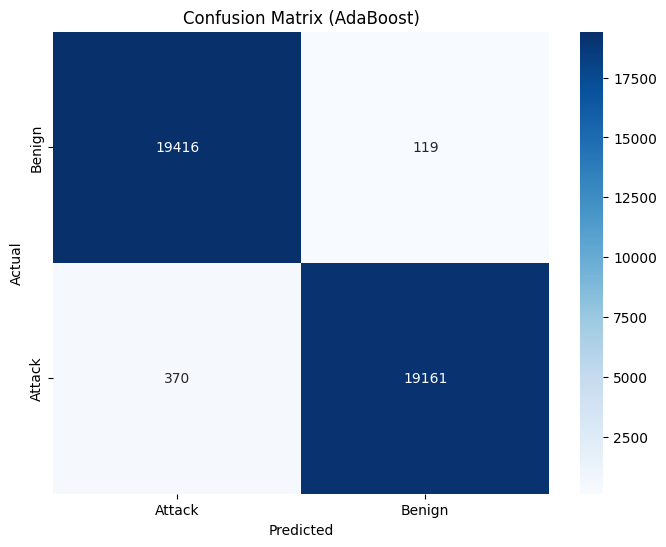

In [94]:
# Determine  confuson mattrix using  AdaBost predictons and true labls
cm_adaboost = confusion_matrix(ytestiot, y_pred_adaboost)

# Adjust  plot's fig size
pltx.figure(figsize=(8, 6))

# Produce a heatmap representation of  confusion matrix with counts indicated by annotations
snsx.heatmap(cm_adaboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Attack', 'Benign'], yticklabels=['Benign', 'Attack'])

#  x-axis should be labeled 'Predicted'
pltx.xlabel('Predicted')

# Indicate 'Actual' on  y-axis
pltx.ylabel('Actual')

# Make "Confuson Matrrix "  plot's tittle
pltx.title('Confusion Matrix (AdaBoost)')

# Show  storyline
pltx.show()

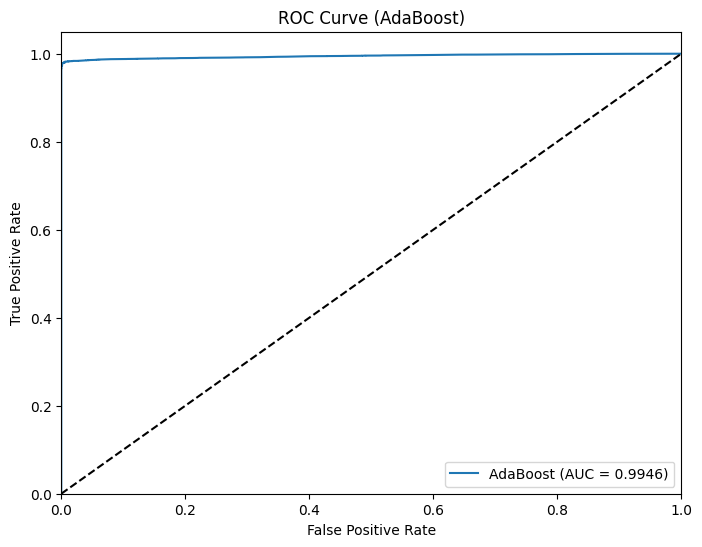

In [95]:
# Determine  falsepositiverate, truepositiverate, and thresholds for AdaBoost predictions.
fpr_adaboost, tpr_adaboost, _ = roc_curve(ytestiot, adaboost_model.predict_proba(Xtestiot)[:, 1])

# Adjust  plot's fig size.
pltx.figure(figsize=(8, 6))

# Plot  ROC curve for  AdaBoost model with a label that includes  AUC score formatted to four decimal places.
pltx.plot(fpr_adaboost, tpr_adaboost, label=f'AdaBoost (AUC = {roc_auc_adaboost:.4f})')

# Show a random classifier baseline by plotting a diagonal dashed line.
pltx.plot([0, 1], [0, 1], 'k--')

# For better viewing, set  x-axis limits from 0 to 1 and  yaxis limits from 0 to slightly over 1.
pltx.xlim([0.0, 1.0])
pltx.ylim([0.0, 1.05])

# Put 'False Positive Rate' on  x-axis and 'True Positive Rate' on  y-axis.
pltx.xlabel('False Positive Rate')
pltx.ylabel('True Positive Rate')

# Put 'ROC Curve (AdaBoost)' as  plot's title.
pltx.title('ROC Curve (AdaBoost)')

# Show  legend in  plot's lower right corner.
pltx.legend(loc="lower right")

# Display  storyline on  screen.
pltx.show()


# **Apply Model 3 - CatBoost**

In [96]:
# Set up  CatBoost Classifier with 100 iterations, a fixed random seed, and no verbose output.
catboost_model = CatBoostClassifier(iterations=100, random_state=42, verbose=False)

# Trainn  CatBost modl on trainning dataa.
catboost_model.fit(Xtrainiot, ytrainiot)

# Predict clas labls on testt dataa.
y_pred_catboost = catboost_model.predict(Xtestiot)

# Predict class's probabilities on testt dataa, extracting  probability of a positive class.
y_pred_proba_catboost = catboost_model.predict_proba(Xtestiot)[:, 1]



# **Training result of catboost**

In [97]:
# Predict labels on  training set using  CatBoost model.
y_pred_train_catboost = catboost_model.predict(Xtrainiot)

# Predict probability scores for ROC AUC calculation from  training set
y_pred_proba_train_catboost = catboost_model.predict_proba(Xtrainiot)[:, 1]

# Determine training accuracy by comparing true and predicted labels
accuracytrainiot_catboost = accuracy_score(ytrainiot, y_pred_train_catboost)
print(f"CatBoost Training Accuracy: {accuracytrainiot_catboost:.4f}")

# Find  modl's precision on trainning dataa
precision_train_catboost = precision_score(ytrainiot, y_pred_train_catboost)

# Find  modl's recall on trainning dataa
recall_train_catboost = recall_score(ytrainiot, y_pred_train_catboost)

# Determine  F1 score  on trainning dataa
f1_train_catboost = f1_score(ytrainiot, y_pred_train_catboost)

# Find  precisionscore on trainning dataa
print(f"CatBoost Training Precision: {precision_train_catboost:.4f}")

# Find  recallscore on trainning dataa
print(f"CatBoost Training Recall: {recall_train_catboost:.4f}")

# Find  F1score on trainning dataa
print(f"CatBoost Training F1 Score: {f1_train_catboost:.4f}")


CatBoost Training Accuracy: 0.9972
CatBoost Training Precision: 1.0000
CatBoost Training Recall: 0.9943
CatBoost Training F1 Score: 0.9971


In [98]:
# Display heading for  trainning sett clasification report
print("\nClassification Report (Training Set):")
# Display comprehensive clasification metrics for training predictions
print(classification_report(ytrainiot, y_pred_train_catboost))


Classification Report (Training Set):
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     78130
           1       1.00      0.99      1.00     78134

    accuracy                           1.00    156264
   macro avg       1.00      1.00      1.00    156264
weighted avg       1.00      1.00      1.00    156264



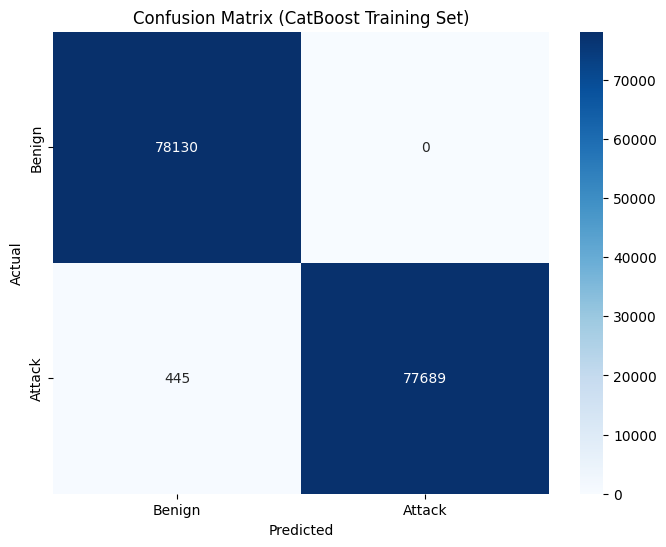

In [99]:
# Construct  confussion mattrix for  CatBoost modl's predictions on  trainning sett.
cm_train_catboost = confusion_matrix(ytrainiot, y_pred_train_catboost)

# Adjust  plot's dimensions
pltx.figure(figsize=(8, 6))

# Use a heattmap with labeled axes, annotations, and an integer format.
snsx.heatmap(cm_train_catboost, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])

# Designate  x-axis as "Preddicted"
pltx.xlabel('Predicted')

# Designate  y-axis as "Acttual"
pltx.ylabel('Actual')

# Set  plot's title to reflect that it is  CatBoost training set's confusion matrix
pltx.title('Confusion Matrix (CatBoost Training Set)')

# Show  plott
pltx.show()


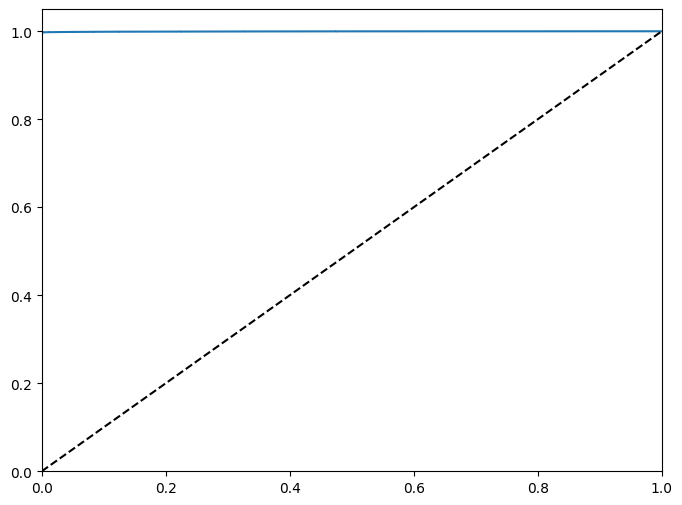

In [100]:
# Determine  falsepositive and truepositiverates for trainning dataa
fpr_train_catboost, tpr_train_catboost, _ = roc_curve(ytrainiot, y_pred_proba_train_catboost)

# Determine  AreaUnder  ROC Crv for CatBost on trainning data
roc_auc_train_catboost = roc_auc_score(ytrainiot, y_pred_proba_train_catboost)

# Make fig of a given size for plotting
pltx.figure(figsize=(8, 6))

# Plott  ROC curve using FalsePR and TruePR for  CatBoost model with AUC in labl
pltx.plot(fpr_train_catboost, tpr_train_catboost, label=f'CatBoost (AUC = {roc_auc_train_catboost:.4f})')

# Plot a diagonal dashed line that represents random chance
pltx.plot([0, 1], [0, 1], 'k--')

# Set  x-axis limit from 0 to 1
pltx.xlim([0.0, 1.0])

# Set  y-axis limit from 0 to just above 1 for improved visualization
pltx.ylim([0.0, 1.05])

# Label  x-axis as False Positive Rate
pltx.show()


# **CatBoost Testing Result**

In [101]:
# Determine  accuracy score using true and predicted labels.
accuracy_catboost = accuracy_score(ytestiot, y_pred_catboost)

# Determine  precisionscore using true and predicted labels.
precision_catboost = precision_score(ytestiot, y_pred_catboost)

# Determine  recallscore using true and predicted labels.
recall_catboost = recall_score(ytestiot, y_pred_catboost)

# Determine  F1score using true and predicted labels.
f1_catboost = f1_score(ytestiot, y_pred_catboost)

# Determine  ROCAUCscore using true labels and predicted probabilities.
roc_auc_catboost = roc_auc_score(ytestiot, y_pred_proba_catboost)

# Show's acuracy score with four decimal places.
print(f"CatBoost Accuracy: {accuracy_catboost:.4f}")

# Use four decimal places for printing  precision score.
print(f"CatBoost Precision: {precision_catboost:.4f}")

# Use four decimal places when printing  recall score.
print(f"CatBoost Recall: {recall_catboost:.4f}")

# Output  F1score
print(f"CatBoost F1 Score: {f1_catboost:.4f}")

# Output  ROC AUC values.
print(f"CatBoost ROC AUC Score: {roc_auc_catboost:.4f}")

CatBoost Accuracy: 0.9952
CatBoost Precision: 1.0000
CatBoost Recall: 0.9903
CatBoost F1 Score: 0.9951
CatBoost ROC AUC Score: 0.9987


In [102]:
# Set Clasification Report
print("\nClassification Report:")
# show's clasification report
print(classification_report(ytestiot, y_pred_catboost))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19535
           1       1.00      0.99      1.00     19531

    accuracy                           1.00     39066
   macro avg       1.00      1.00      1.00     39066
weighted avg       1.00      1.00      1.00     39066



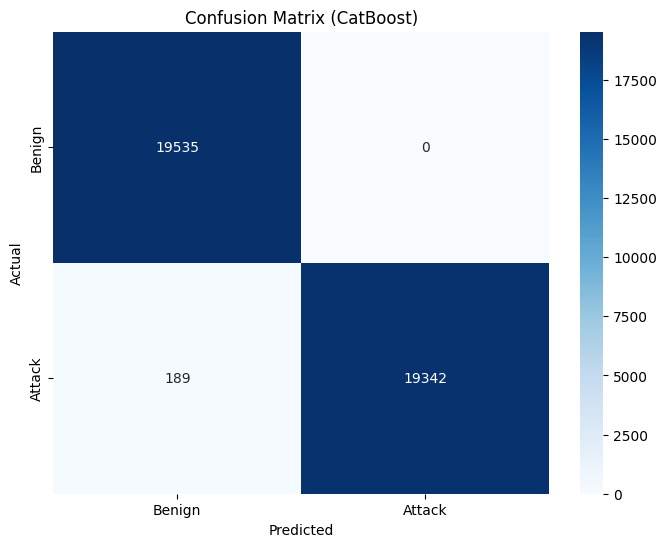

In [103]:
# Create  confuson mattrix using actual and predicted values
cm_catboost = confusion_matrix(ytestiot, y_pred_catboost)

# Determine  heatmap's figure size
pltx.figure(figsize=(8, 6))

# Create a heattmap witth annotations using  confusion matrix, formatting data as integers, and setting axis labls
snsx.heatmap(cm_catboost, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])

# Labl  xaxis as "Preddicted"
pltx.xlabel('Predicted')

# Labl  yaxis as "Acttual"
pltx.ylabel('Actual')

# Set  confussion mattrix plott's tittle
pltx.title('Confusion Matrix (CatBoost)')

# output  plott
pltx.show()


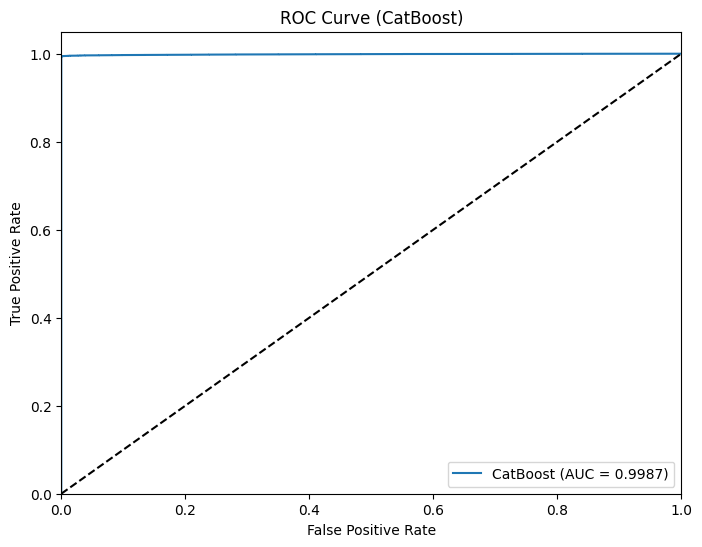

In [104]:
# Determine  FalsePositiveRate, TruePositiveRate, and thresholds for CatBoost predictions
fpr_catboost, tpr_catboost, _ = roc_curve(ytestiot, y_pred_proba_catboost)
roc_auc_catboost = roc_auc_score(ytestiot, y_pred_proba_catboost)

# Make a new figure that is 8 by 6 inches in size for plotting.
pltx.figure(figsize=(8, 6))

# Draw the ROC curve, labeling it with the AUC score formatted to four decimals, with the FPR on the x-axis and the TPR on the y-axis.
pltx.plot(fpr_catboost, tpr_catboost, label=f'CatBoost (AUC = {roc_auc_catboost:.4f})')

# Plot a diagonal dashed line that represents  random guessing baseline
pltx.plot([0, 1], [0, 1], 'k--')

# Set  x-axis limits
pltx.xlim([0, 1])

# For better visualization, set  y-axis limits from 0 to slightly above 1
pltx.ylim([0, 1.05])

# Set  plot's title to "ROC Curve (CatBoost)"
pltx.title('ROC Curve (CatBoost)')

# Labl  xaxis "FalsePositiveRate"
pltx.xlabel('False Positive Rate')

# Labl  yaxis "TruePositiveRate"
pltx.ylabel('True Positive Rate')

# Include a legend in  plott's lowerightcorner
pltx.legend(loc='lower right')

# Show plott
pltx.show()


# **Model Comparison Graph**

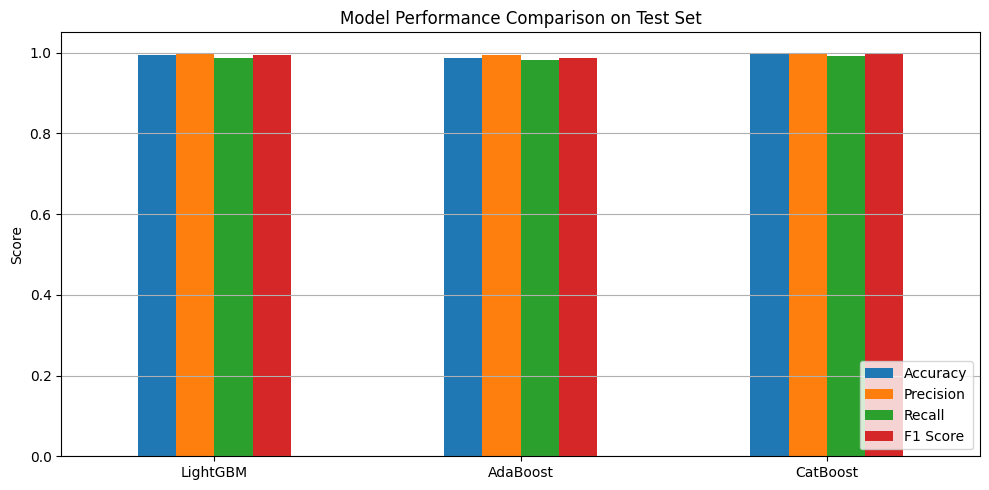

In [105]:
# Create a dictionary to store performance metrics for multiple models
model_performance = {
    'LightGBM': {  # Performance metrics for the LGBM modl
        'Accuracy': accuracy_lgbm,         # Accuracyscore of LGBM
        'Precision': precision_lgbm,       # Precisionscore of LGBM
        'Recall': recall_lgbm,             # Recallscore of LGBM
        'F1 Score': f1_lgbm,               # F1Score of LGBM
    },
    'AdaBoost': {  # Performance metrics for the AdaBoost modl
        'Accuracy': accuracy_adaboost,     # Accuracyscore of AdaBost
        'Precision': precision_adaboost,   # Precisionscore of AdaBost
        'Recall': recall_adaboost,         # Recallscore of AdaBost
        'F1 Score': f1_adaboost,           # F1Score of AdaBost
    },
    'CatBoost': {  # Performance metrics for the CatBost model
        'Accuracy': accuracy_catboost,     # Accuracyscore of CatBost
        'Precision': precision_catboost,   # Precisionscore of CatBost
        'Recall': recall_catboost,         # Recallscore of CatBost
        'F1 Score': f1_catboost,           # F1Score of CatBAost
    }
}

# Convert  dictionary into a pandas DataFrame for a tabular summary of model performance
performance_df = pdx.DataFrame.from_dict(model_performance, orient='index')

# Plot  DataFrame as a bar chart for easy comparison
performance_df.plot(kind='bar', figsize=(10, 5))

# Set  plot's title to reflect  comparison's goal
pltx.title('Model Performance Comparison on Test Set')

# Indicate that  numbers on  Y-axis correspond to performance scores
pltx.ylabel('Score')

# For easier reading, keep  X-axis labels horizontal
pltx.xticks(rotation=0)

# Place  legend in  plot's lower right corner
pltx.legend(loc='lower right')

# To facilitate value comparison, add horizontal grid lines to  plot
pltx.grid(axis='y')

# Modify  arrangement to avoid label and element clipping
pltx.tight_layout()

# present  storyline
pltx.show()

# **Best Performance Model**

In [106]:
# Obtain  name or index of  model with  best accuracy by selecting  highest accuracy value from  'Accuracy' column.
best_model_accuracy = performance_df['Accuracy'].max()

# Identify  model name corresponding to  best accuracy.
best_model_name_accuracy = performance_df['Accuracy'].idxmax()

# Print, formatted to four decimal places,  model name and  associated accuracy number.
print(f" model with  best accuracy on  test set is {best_model_name_accuracy} with an accuracy of {best_model_accuracy:.4f}")

 model with  best accuracy on  test set is CatBoost with an accuracy of 0.9952


# **SHAP summary plot**

SHAP values returned as a single array. Assuming it's for positive class (1).
Generating SHAP Summary Plots for each class...


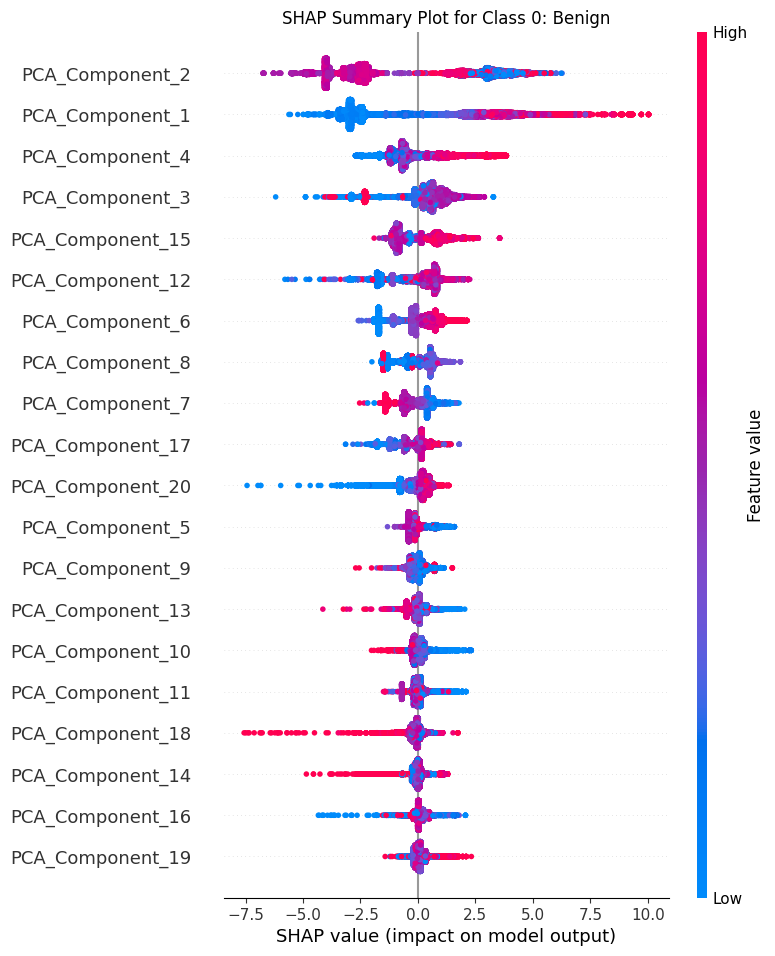

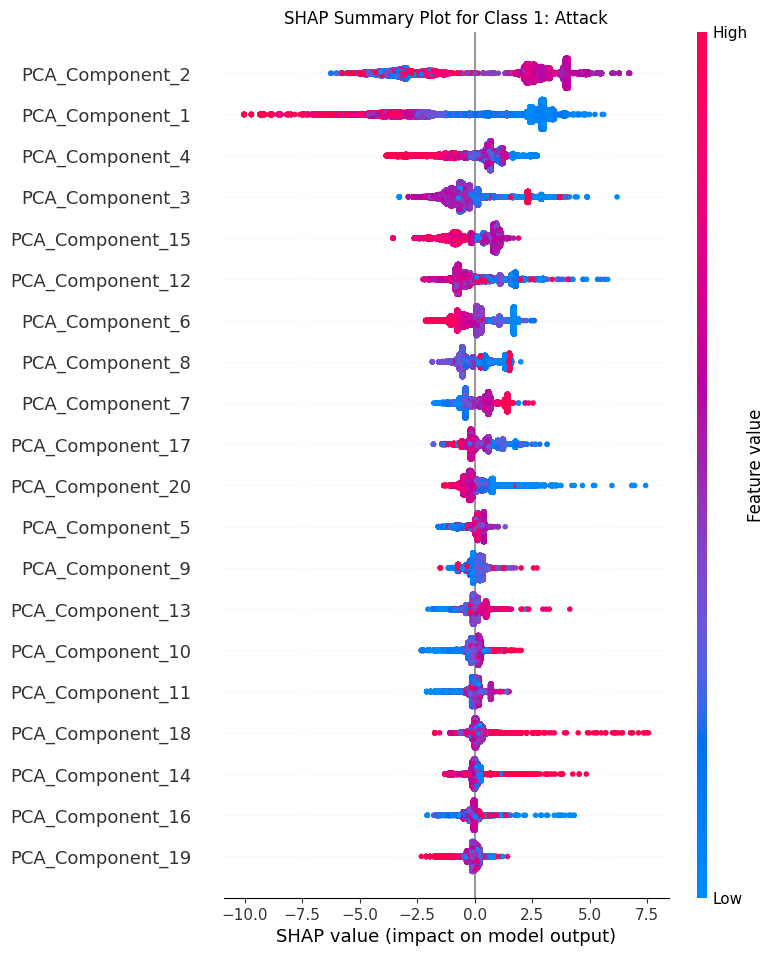

In [107]:
# Assign  trained CatBoost model to a variable called "best_model."
best_model = catboost_model

# Use SHAP's TreeExplainer, which is tuned for tree-based models like CatBoost.
explainer = shap.TreeExplainer(best_model)

# Calculate  SHAPvalus for  testt dataset.
shap_values = explainer.shap_values(Xtestiot)

# Verify if  SHAPvales are provided as a list, as this can occur in classification jobs.
if isinstance(shap_values, list) and len(shap_values) == 2:
    # Extract values for both classes (0 and 1) if SHAP values are returned as a list of length 2.
    shap_values_class_0 = shap_values[0]
    shap_values_class_1 = shap_values[1]
elif not isinstance(shap_values, list):
    # If SHAPvalus are not a list, presume that y are a single array for  posittive claass .
    # Print a notice stating that class 1 SHAP values are presumed.
    print("SHAP values returned as a single array. Assuming it's for positive class (1).")
    shap_values_class_1 = shap_values
    # For binary classification, approximate class 0 SHAP values as  negative of class 1 values.
    shap_values_class_0 = -shap_values
else:
    # Deal with unforeseen SHAP output formats.
    # Print  type and length (if relevant) of SHAP values to aid in debugging.
    print("Unexpected format for shap_values from TreeExplainer in binary classification.")
    print(f"Type: {type(shap_values)}, Length: {len(shap_values) if isinstance(shap_values, list) else 'N/A'}")
    # Set SHAPvalus for both classes to None to stop furr plotting
    shap_values_class_0 = None
    shap_values_class_1 = None

# Alert users that SHAP summary plots are being created for each class
print("Generating SHAP Summary Plots for each class...")

# Create and show a summary plot if SHAPvalus for claass 0 are available.
if shap_values_class_0 is not None:
    # Adjust figure size for improved visibility.
    pltx.figure(figsize=(10, 6))
    # Use  test dataaset to create a SHAP summary plot (dot plot) for class 0.
    shap.summary_plot(shap_values_class_0, Xtestiot, plot_type="dot", show=False)
    # Change  plott tittle to reflect that it is for class 0 .
    pltx.title('SHAP Summary Plot for Class 0: Benign')
    # present plott.
    pltx.show()

# Create a summary plot using  test dataset if SHAPvalus for claass 1 are available.
if shap_values_class_1 is not None:
    # Adjust figure size for improved visibility.
    pltx.figure(figsize=(10, 6))
    # Make a SHAPsummaryplot for class 1 and change  plot title to suit  class 1 setting.
    shap.summary_plot(shap_values_class_1, Xtestiot, plot_type="dot", show=False)
    pltx.title('SHAP Summary Plot for Class 1: Attack')
    # Show  plot.
    pltx.show()


# **LIME Graph**

In [108]:
if 'catboost_model' in globals() and catboost_model is not None:
    print("Generating LIME explanations for CatBoost model...")

    # Verify that Xtrainiot is a pandas DataFrame with column names
    # Verify that Xtrainiot is a DataFrame if it has changed from a DataFrame
    if not isinstance(Xtrainiot, pdx.DataFrame):
        # Handle  situation where X is not available; create a DataFrame without  original column names
        if 'X' in globals():
            # If X is accessible, use X's columns to convert Xtrainiot to a DataFrame
            Xtrainiot_df = pdx.DataFrame(Xtrainiot, columns=X.columns)
        else:
            Xtrainiot_df = pdx.DataFrame(Xtrainiot)
            # Print a warning if column names could not be preserved
            print("Warning: Could not access original column names from 'X'. Using default column names for Xtrainiot_df.")
    else:
        # Assign Xtrainiot directly if it is already a DataFrame
        Xtrainiot_df = Xtrainiot

    # Determine  mean values of features for perturbed sample generation
    feature_means = Xtrainiot_df.mean().values
    # Determine  standard deviation of features for perturbed sample generation
    feature_stds = Xtrainiot_df.std().values

    # Set up LIME TabularExplainer using feature information and training data
    explainer = lime.lime_tabular.LimeTabularExplainer(
        training_data=Xtrainiot_df.values,
        feature_names=Xtrainiot_df.columns.tolist(),
        # Indicate  names of  binary classes
        class_names=['Benign', 'Attack'],
        # Put  classifying mode in place
        mode='classification',
        # Enable discretization of continuous variables
        discretize_continuous=True,
    )

    # Initialize a list to hold indices of test instances to explain
    test_instance_indices = []

    # Get indices of benign (class 0) instances in ytestiot
    benign_indices = ytestiot[ytestiot == 0].index
    # Append  first one to  list if benign instances exist
    if len(benign_indices) > 0:
        test_instance_indices.append(benign_indices[0])
    else:
        # Print warning if no benign instances are found
        print("Warning: No benign instances found in test set to explain.")

    # Get indices of attack (class 1) instances in ytestiot
    attack_indices = ytestiot[ytestiot == 1].index
    # Append  first one to  list if attack instances exist
    if len(attack_indices) > 0:
        test_instance_indices.append(attack_indices[0])
    else:
        # Print warning if no attack instances are found
        print("Warning: No attack instances found in test set to explain.")

    # Verify wher any test instance indices were found
    if not test_instance_indices:
        # Print message if no instances from eir class were found
        print("No test instances found to explain after checking for both classes.")
    else:
        # Make sure Xtestiot is a pandas DataFrame for indexing and explanation
        if not isinstance(Xtestiot, pdx.DataFrame):
            # If X is accessible, use X's columns to convert Xtestiot to a DataFrame while maintaining  index
            if 'X' in globals():
                Xtestiot_df = pdx.DataFrame(Xtestiot, columns=X.columns, index=ytestiot.index)
            else:
                # If X is not available, construct a DataFrame without  original column names while maintaining  index
                Xtestiot_df = pdx.DataFrame(Xtestiot, index=ytestiot.index)
                # Print a warning if column names could not be preserved for Xtestiot
                print("Warning: Could not access original column names from 'X'. Using default column names for Xtestiot_df.")
        else:
            # Assign Xtestiot directly if it is already a DataFrame
            Xtestiot_df = Xtestiot

        # Loop through a subset of test instance indices for explanation
        for idx in test_instance_indices:
            # Extract instance feature values and reshape for LIME inpxut
            instance_data = Xtestiot_df.loc[idx].values.reshape(1, -1)
            # Determine  true label from ytestiot for display purposes
            true_label = 'Attack' if ytestiot.loc[idx] == 1 else 'Benign'

            # Print a message with  instance's true label and  instance being explained
            print(f"\nExplaining instance at index {idx} (True Label: {true_label})...")

            # produce a LIME explannation using  CatBost modl.
            explanation = explainer.explain_instance(
                # Enter  instance feature values
                data_row=instance_data[0],
                # Provide  predict_proba function for  probability outputs of  CatBoost model
                predict_fn=catboost_model.predict_proba,
                # Indicate how many best featurres to include in  explanation
                num_features=10
            )

            # Output  explannation as a list of  features that are affected.
            print("LIME Explanation:")
            # Print  weights of each feature as you go through  explanation
            for feature, weight in explanation.as_list():
                print(f"  {feature}: {weight:.4f}")

            # Signal that a visual explanation is being displayed
            print("LIME Visualization:")
            # In  notebook, display an interactive explannation
            explanation.show_in_notebook(show_table=True, show_all=False)

else:
    # If  CatBoost model is not accessible or trained, print a notice
    print("CatBoost model ('catboost_model') is not trained or available. Cannot generate LIME explanations.")


Generating LIME explanations for CatBoost model...

Explaining instance at index 83341 (True Label: Benign)...
LIME Explanation:
  PCA_Component_2 <= -0.97: -0.1354
  -1.16 < PCA_Component_1 <= 1.54: -0.0922
  PCA_Component_6 > 0.84: -0.0612
  PCA_Component_17 <= -0.02: -0.0468
  -0.11 < PCA_Component_8 <= 0.31: -0.0459
  PCA_Component_3 > 0.16: 0.0391
  PCA_Component_5 <= -0.06: -0.0349
  PCA_Component_15 <= -0.45: -0.0328
  PCA_Component_9 <= -0.75: -0.0301
  0.04 < PCA_Component_16 <= 0.23: -0.0277
LIME Visualization:



Explaining instance at index 68403 (True Label: Attack)...
LIME Explanation:
  PCA_Component_1 <= -2.10: 0.1292
  0.43 < PCA_Component_2 <= 0.93: 0.0605
  PCA_Component_3 > 0.16: 0.0530
  -0.75 < PCA_Component_9 <= -0.18: -0.0393
  PCA_Component_17 > 0.03: 0.0330
  PCA_Component_15 <= -0.45: -0.0325
  -0.12 < PCA_Component_12 <= -0.02: -0.0317
  -0.01 < PCA_Component_6 <= 0.84: -0.0286
  PCA_Component_16 <= -0.26: 0.0250
  0.15 < PCA_Component_20 <= 0.37: -0.0233
LIME Visualization:


# **SHAP Froce plot class 1**

In [109]:
# Check if re are any test instance indices available
if test_instance_indices:
    # Select  first test instance index to explain using SHAP
    instance_index_to_explain = test_instance_indices[0]
    # Print  chosen instance index for confirmation
    print(f"Using instance index {instance_index_to_explain} for SHAP force plot.")
else:
    # If no test instance indices found, fallback to  first index of  test dataset
    # Change Xtestiot to Xtestiot
    instance_index_to_explain = Xtestiot.index[0]
    # Print which fallback index is used for  SHAP force plot
    print(f"No test instance indices found, using  first index of Xtestiot: {instance_index_to_explain} for SHAP force plot.")

# Check if SHAP values for Class 1 exist and  chosen instance index is in  test data index
# Change Xtestiot to Xtestiot
if shap_values_class_1 is not None and instance_index_to_explain in Xtestiot.index:
    # Try to find  positional index of  instance in  test dataset (may not be zero-based)
    try:
        # Change Xtestiot to Xtestiot
        positional_index = Xtestiot.index.get_loc(instance_index_to_explain)
    except KeyError:
        # If  instance index is not found, catch  KeyError and notify  user
        # Change Xtestiot to Xtestiot
        print(f"Error: Instance index {instance_index_to_explain} not found in Xtestiot index.")
        # Set positional index to None if instance index lookup fails
        positional_index = None

    # If positional index was successfully found
    if positional_index is not None:
        # Exttract  instance-corresponding SHAP values for Claass 1.
        instance_shapvalues_class_1 = shap_values_class_1[positional_index]
        # Extract  test data row for  instance as a DataFrame
        instance_data = Xtestiot.loc[[instance_index_to_explain]]

        # Print information about  SHAP force plot generation for  instance
        # Change Xtestiot to Xtestiot
        print(f"\nGenerating SHAP Force Plot for Test Sample (Original Index: {instance_index_to_explain}, Positional Index in Xtestiot: {positional_index}) (Predicting Class 1: Attack)")

        # Check if  explainer has an expectedvalue attribute for base value of SHAP
        if hasattr(explainer, 'expected_value'):
            # If expectedvalue is a list/array with multiple values
            if isinstance(explainer.expected_value, (list, npx.ndarray)) and len(explainer.expected_value) > 1:
                # Use  second value as base value assuming class order [0, 1]
                expected_value_class_1 = explainer.expected_value[1]
                # Print  base value being used for Class 1
                print(f"Using explainer.expected_value[1] as base value for Class 1: {expected_value_class_1:.4f}")
            else:
                # If expected_value is a single value
                expected_value_class_1 = explainer.expected_value
                # Print  base value used for Class 1
                print(f"Using explainer.expected_value as base value for Class 1: {expected_value_class_1:.4f}")
        else:
            # If explainer does not have expected_value, approximate base value as mean SHAP for Class 1
            expected_value_class_1 = shap_values_class_1.mean()
            # Print  approximated base value from mean SHAP values
            print(f"Approximating base value for Class 1 from mean of SHAP values: {expected_value_class_1:.4f}")

        shap.initjs()
        # Generaate  SHAPforceplot using base value, SHAP values for  instance, and instance data (as a series)
        force_plot_html_class_1 = shap.force_plot(expected_value_class_1, instance_shapvalues_class_1, instance_data.iloc[0])
        # Display  generated SHAP force plot visualization
        display(force_plot_html_class_1)

else:
    # If SHAP values or instance index are missing, print error messages and guidance
    # Change Xtestiot to Xtestiot
    print(f"Could not generate SHAP Force Plot for  specified test sample (Original Index: {instance_index_to_explain}, Positional Index in Xtestiot could not be determined).")
    print("Ensure 'shapvalues_class_1' is calculated and  specified index exists in  test set.")

Using instance index 83341 for SHAP force plot.

Generating SHAP Force Plot for Test Sample (Original Index: 83341, Positional Index in Xtestiot: 2) (Predicting Class 1: Attack)
Approximating base value for Class 1 from mean of SHAP values: -0.0008


# **SHAP Froce plot class 0**

In [110]:
# Ensure shapvalues for Class 0 are available and  selected instance index exists in  test data
# Replace Xtestiot with Xtestiot
if shap_values_class_0 is not None and instance_index_to_explain in Xtestiot.index:

    try:
        # Attempt to get  positional index of  instance in Xtestiot. This handles non-zero-based indices.
        # Replace Xtestiot with Xtestiot
        positional_index = Xtestiot.index.get_loc(instance_index_to_explain)
    except KeyError:
        # If  instance index is not found in Xtestiot's index, print an error and set positional_index to None.
        # Replace Xtestiot with Xtestiot
        print(f"Error: Instance index {instance_index_to_explain} not found in Xtestiot index.")
        positional_index = None

    # Only proceed if a valid positional index was found
    if positional_index is not None:
        # Retrieve  Shapp valus for Claass 0 and  particular instance.
        instance_shapvalues_class_0 = shap_values_class_0[positional_index]
        # Extract  corresponding instance data row as a DataFrame
        # Replace Xtestiot with Xtestiot
        instance_data = Xtestiot.loc[[instance_index_to_explain]]

        # Print a message indicating that  SHAP force plot for Class 0 is being generated for  specified instance
        # Replace Xtestiot with Xtestiot
        print(f"\nGenerating SHAP Force Plot for Test Sample (Original Index: {instance_index_to_explain}, Positional Index in Xtestiot: {positional_index}) (Predicting Class 0: Benign)")

        # If  explainr has an 'expected_value' attribute:
        if hasattr(explainer, 'expected_value'):
            # use  first element as  base value for Class 0 (assuming class order [0, 1]).
            if isinstance(explainer.expected_value, (list, npx.ndarray)) and len(explainer.expected_value) > 0:
                expected_value_class_0 = explainer.expected_value[0]

                print(f"Using explainer.expected_value[0] as base value for Class 0: {expected_value_class_0:.4f}")
            # where two sets of values are produced. This case might indicate an issue or a different explainer type.
            # For robust handling, we might add a fallback here, but for TreeExplainer producing list of two,
            #  above condition should cover it.
            else:
                 # Fallback or warning if expectedvalue format is unexpected
                 print(f"Warning: Unexpected explainer.expected_value format for Class 0 base value: {explainer.expected_value}. Approximating from mean of SHAP values.")
                 expected_value_class_0 = shap_values_class_0.mean()
                 # output approximated base value
                 print(f"Approximating base value for Class 0 from mean of SHAP values: {expected_value_class_0:.4f}")

        # If  explainer does NOT have an 'expected_value' attribute (e.g., some older explainer types or custom):
        else:
            # Approximate  basse valu for Classs 0 by taking  mean of  SHAP values for Class 0 across  test set.
            expected_value_class_0 = shap_values_class_0.mean()
            # Print  approximated basse valu used for Classs 0
            print(f"Approximating base value for Class 0 from mean of SHAP values: {expected_value_class_0:.4f}")

        # Initialze JS support for SHAP interactive plots in notebok
        shap.initjs()
        # Generate  SHAPforceplot using  determined basse valu, instance SHAP values
        force_plot_html_class_0 = shap.force_plot(expected_value_class_0, instance_shapvalues_class_0, instance_data.iloc[0])
        # Display  interactive SHAP forceplot inline in  notebook
        display(force_plot_html_class_0)

# print an error message and instructions.
else:
    # Replace Xtestiot with Xtestiot
    print(f"Could not generate SHAP Force Plot for  specified test sample (Original Index: {instance_index_to_explain}, Positional Index in Xtestiot could not be determined) for Class 0: Benign.")
    # Provide guidance on potential issues
    print("Ensure 'shapvalues_class_0' is calculated and  specified index exists in  test set.")


Generating SHAP Force Plot for Test Sample (Original Index: 83341, Positional Index in Xtestiot: 2) (Predicting Class 0: Benign)
Approximating base value for Class 0 from mean of SHAP values: 0.0008
